<a href="https://colab.research.google.com/github/akidss/Sentiment-Analysis-with-Python-Preprocessing-process/blob/main/Sentiment_Analysis_CyberBullying_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re

#note
#pandas : library ini digunakan untuk manipulasi dan analisis data dalam Python.
#numpy : Library ini menyediakan dukungan untuk operasi numerik dan array multidimensi.
#re : Fungsinya sangat berguna untuk mencari, mengganti, atau memodifikasi teks berdasarkan pola tertentu dalam string.

In [ ]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import matplotlib.pyplot as plt
from collections import Counter

# note
# Sastrawi : Sastrawi adalah library yang digunakan untuk pemrosesan bahasa alami (NLP) dalam Bahasa Indonesia, terutama untuk tugas stemming.
# Modul StopWordRemover dalam Sastrawi.StopWordRemover membantu menghapus stopwords atau kata-kata umum yang tidak memiliki makna signifikan dalam analisis teks (misalnya: "yang", "dan", "di").
# StopWordRemoverFactory: Membuat stopword remover berbasis daftar kata yang umum.
# StopWordRemover: Melakukan proses pembersihan stopwords.
# ArrayDictionary: Mendefinisikan daftar kata khusus yang akan dijadikan stopwords untuk kustomisasi proses stopword removal.
# matplotlib.pyplot adalah modul dari Matplotlib yang digunakan untuk visualisasi data.
# Counter adalah bagian dari modul collections di Python, dan digunakan untuk menghitung frekuensi elemen dalam suatu koleksi (misalnya list, tuple, atau string).


In [ ]:
df = pd.read_csv("/content/bully_sosial_media_800up.csv")
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1836981608722948206,Fri Sep 20 04:11:59 +0000 2024,4,Perundungan lagi Sebuah video aksi perundungan...,1836981608722948206,https://pbs.twimg.com/ext_tw_video_thumb/18369...,NaN,in,NaN,1,6,7,https://x.com/detik_sumbagsel/status/183698160...,1691738337458151424,detik_sumbagsel
1,1836379670549250201,Wed Sep 18 13:08:46 +0000 2024,0,@basebuku second sister ini cocok buat yang la...,1836391917745246464,NaN,thisylus,in,Skye. Books. LaDS.,0,1,0,https://x.com/thisylus/status/1836391917745246464,1739518729304911872,thisylus
2,1836207823962943679,Wed Sep 18 04:21:23 +0000 2024,0,@PIDM_Bojonegoro @DivHumas_Polri @Spripim_Polr...,1836259197555708180,NaN,PIDM_Bojonegoro,in,NaN,0,0,0,https://x.com/MulyonoVideo/status/183625919755...,1551782773358137344,MulyonoVideo
3,1836014954845290542,Tue Sep 17 12:10:51 +0000 2024,0,Geger Tuduhan Bullying di Brandoville Studio V...,1836014954845290542,NaN,NaN,in,NaN,0,0,0,https://x.com/ibenewsid/status/183601495484529...,1499977907074383874,ibenewsid
4,1835977642375602648,Tue Sep 17 09:42:36 +0000 2024,7,2. Apa saja jenisnya? A. Bullying Verbal (Meng...,1835977647257801192,NaN,nznalmairra,in,NaN,0,1,0,https://x.com/nznalmairra/status/1835977647257...,1835585247054082048,nznalmairra


In [ ]:
df.describe()

,conversation_id_str,favorite_count,id_str,quote_count,reply_count,retweet_count,user_id_str
count,8.070000e+02,807.000000,8.070000e+02,807.000000,807.000000,807.000000,8.070000e+02
mean,1.619051e+18,10.379182,1.619197e+18,0.214374,0.871128,1.698885,8.545720e+17
std,1.513620e+17,176.129563,1.513391e+17,1.599439,5.080811,17.478943,6.628845e+17
min,1.370209e+18,0.000000,1.370232e+18,0.000000,0.000000,0.000000,6.335682e+06
25%,1.496895e+18,0.000000,1.496895e+18,0.000000,0.000000,0.000000,5.553682e+08
50%,1.658850e+18,0.000000,1.658850e+18,0.000000,0.000000,0.000000,1.109999e+18
75%,1.733029e+18,1.000000,1.733029e+18,0.000000,1.000000,0.000000,1.395520e+18
max,1.836982e+18,4928.000000,1.836982e+18,27.000000,95.000000,374.000000,1.835585e+18


In [ ]:
df.shape

(807, 15)

In [ ]:
df = df.drop_duplicates(subset=['full_text'])

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(780, 15)

In [ ]:
df.isna().sum()

,0
conversation_id_str,0
created_at,0
favorite_count,0
full_text,0
id_str,0
image_url,560
in_reply_to_screen_name,453
lang,0
location,317
quote_count,0


In [ ]:
df = df[['full_text','username','created_at']]
df

,full_text,username,created_at
0,Perundungan lagi Sebuah video aksi perundungan...,detik_sumbagsel,Fri Sep 20 04:11:59 +0000 2024
1,@basebuku second sister ini cocok buat yang la...,thisylus,Wed Sep 18 13:08:46 +0000 2024
2,@PIDM_Bojonegoro @DivHumas_Polri @Spripim_Polr...,MulyonoVideo,Wed Sep 18 04:21:23 +0000 2024
3,Geger Tuduhan Bullying di Brandoville Studio V...,ibenewsid,Tue Sep 17 12:10:51 +0000 2024
4,2. Apa saja jenisnya? A. Bullying Verbal (Meng...,nznalmairra,Tue Sep 17 09:42:36 +0000 2024
...,...,...,...
802,@Humas_ResPBG Waspadai kasus kejahatan yang ba...,HPadamara,Fri Mar 12 04:37:25 +0000 2021
803,@humas_sampang 1.Di era teknologi seperti seka...,Finae20,Fri Mar 12 04:37:16 +0000 2021
804,Di era teknologi seperti sekarang ini kejahata...,restabengkulu,Fri Mar 12 04:37:06 +0000 2021
805,@Humas_ResPBG Waspadai kasus kejahatan yang ba...,HPadamara,Fri Mar 12 04:37:00 +0000 2021


In [ ]:
## Menghapus karakter khusus yang ada didalam dataset kita sepert @Mentions, #Hastag, Url dan lain-lain
def clean_twitter_text(text):
    # Menghapus @Mentions, #Hashtags, dan URL yang valid
    text = re.sub(r"([@#][A-Za-z0-9]+)|(https?://\S+)|(www\.\S+)", " ", text)
    # Menghapus karakter tunggal
    text = re.sub(r"\b[a-zA-Z]\b", "", text)
    # Menghapus spasi berlebih
    text = re.sub(r'\s+', ' ', text)
    # Menghapus angka
    text = re.sub(r"\d+", "", text)
    # Menghapus tanda baca di sekitar kata
    text = re.sub('(?<! )(?=[.,!?()])|(?<=[.,!?()])(?! )', ' ', text)
    # Menghapus kata 'RT'
    text = re.sub(r'RT', " ", text)
    # Menghapus karakter non-ASCII
    text = re.sub(r'[\U00010000-\U0010ffff]', "", text)
    # Menghapus karakter non-ASCII tambahan
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Menghapus beberapa karakter tertentu
    text = text.replace('..', " ")
    text = text.replace('-', " ")
    text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")

    # Menghapus URL yang tersisa setelah pembersihan sebelumnya
    text = re.sub(r"(https?://\S+)|(www\.\S+)", "", text)
    # Menghapus tanda baca berlebihan seperti tanda seru (!) (,) dan titik (.)
    text = re.sub(r'!+', ' ', text)
    text = re.sub(r'\.+', ' ', text)
    text = re.sub(r'\?+', ' ', text)
    text = re.sub(r"https?://\S+", "", text)
    text = re.sub(r"www\.\S+", "", text)
    # Menghapus spasi ganda
    text = re.sub(r'\s+', ' ', text)
    # Menghapus karakter |
    text = re.sub(r'\|', '', text)
    # Menghapus koma
    text = re.sub(r',', '', text)

    return text

    return text

# Apply the cleaning function to the 'full_text' column
df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [ ]:
def remove_underscore_parentheses(text):
    text = re.sub(r"[_()]", "", text)
    return text

df['full_text'] = df['full_text'].apply(remove_underscore_parentheses)

In [ ]:
print(df['full_text'])


0      Perundungan lagi Sebuah video aksi perundungan...
1       second sister ini cocok buat yang lagi nyari ...
2       Bojonegoro Polri Polri Dengan edukasi ini dih...
3      Geger Tuduhan Bullying di Brandoville Studio V...
4       Apa saja jenisnya Bullying Verbal  Menghina d...
                             ...                        
802     ResPBG Waspadai kasus kejahatan yang banyak t...
803     sampang Di era teknologi seperti sekarang ini...
804    Di era teknologi seperti sekarang ini kejahata...
805     ResPBG Waspadai kasus kejahatan yang banyak t...
806    Waspadai kasus kejahatan yang banyak terjadi m...
Name: full_text, Length: 780, dtype: object


#**Preprocessing**


In [ ]:
dataset = df

In [ ]:
dataset.head()

,full_text,username,created_at
0,Perundungan lagi Sebuah video aksi perundungan...,detik_sumbagsel,Fri Sep 20 04:11:59 +0000 2024
1,second sister ini cocok buat yang lagi nyari ...,thisylus,Wed Sep 18 13:08:46 +0000 2024
2,Bojonegoro Polri Polri Dengan edukasi ini dih...,MulyonoVideo,Wed Sep 18 04:21:23 +0000 2024
3,Geger Tuduhan Bullying di Brandoville Studio V...,ibenewsid,Tue Sep 17 12:10:51 +0000 2024
4,Apa saja jenisnya Bullying Verbal Menghina d...,nznalmairra,Tue Sep 17 09:42:36 +0000 2024


In [ ]:
print(dataset.tail(10)['full_text'])

797     sampang jatim di era teknologi seperti sekara...
798     sampang di era teknologi seperti sekarang ini...
799     sampang di era teknologi seperti sekarang ini...
800     respbg waspadai kasus kejahatan yang banyak t...
801     sampang di era teknologi seperti sekarang ini...
802     respbg waspadai kasus kejahatan yang banyak t...
803     sampang di era teknologi seperti sekarang ini...
804    di era teknologi seperti sekarang ini kejahata...
805     respbg waspadai kasus kejahatan yang banyak t...
806    waspadai kasus kejahatan yang banyak terjadi m...
Name: full_text, dtype: object


##1.Normalisasi

In [ ]:
nor = {
    "yg": "yang",
    "bntar": "bentar",
    "gak": "tidak",
    "bgt": "banget",
    "lg": "lagi",
    "udah": "sudah",
    "gw": "saya",
    "lu": "kamu",
    "emang": "memang",
    "tkg": "tukang",
    "now" : "sekarang",
    "insider": "orang dalam",
    "whyyy" : "kenapa",
    "tp": "tapi",
    "leceh" : "pelecehan",
    "jd": "jadi",
    "odgj": "orang dengan gangguan jiwa",
    "second sister" : "saudara perempuan",
    "polri" : "polisi republik indonesia",
    "respbg" : "samapta polres purbalingga"
}

In [ ]:
def normalisation(str_text):
    for i in nor:
        str_text = str_text.replace(i, nor[i])
    return str_text
dataset['full_text'] = df['full_text'].apply(lambda x: normalisation(x))
dataset

,full_text,username,created_at
0,Perundungan lagi Sebuah video aksi perundungan...,detik_sumbagsel,Fri Sep 20 04:11:59 +0000 2024
1,saudara perempuan ini cocok buat yang lagi ny...,thisylus,Wed Sep 18 13:08:46 +0000 2024
2,Bojonegoro Polri Polri Dengan edukasi ini dih...,MulyonoVideo,Wed Sep 18 04:21:23 +0000 2024
3,Geger Tuduhan Bullying di Brandoville Studio V...,ibenewsid,Tue Sep 17 12:10:51 +0000 2024
4,Apa saja jenisnya Bullying Verbal Menghina d...,nznalmairra,Tue Sep 17 09:42:36 +0000 2024
...,...,...,...
802,ResPBG Waspadai kasus kejahatan yang banyak t...,HPadamara,Fri Mar 12 04:37:25 +0000 2021
803,sampang Di era teknologi seperti sekarang ini...,Finae20,Fri Mar 12 04:37:16 +0000 2021
804,Di era teknologi seperti sekarang ini kejahata...,restabengkulu,Fri Mar 12 04:37:06 +0000 2021
805,ResPBG Waspadai kasus kejahatan yang banyak t...,HPadamara,Fri Mar 12 04:37:00 +0000 2021


In [ ]:
print(dataset.head(10)['full_text'])

0    Perundungan lagi Sebuah video aksi perundungan...
1     saudara perempuan ini cocok buat yang lagi ny...
2     Bojonegoro Polri Polri Dengan edukasi ini dih...
3    Geger Tuduhan Bullying di Brandoville Studio V...
4     Apa saja jenisnya Bullying Verbal  Menghina d...
5    Untuk menghindari itu ada beberapa hal yang bi...
6    Salah satu cara memutuskan perilaku bullying a...
7    Viral di media sosial kasus perundungan di SMA...
8      Pendukung anies kebanyakan anak muda yang be...
9    Video satu siswa diadu berganti gantian diduga...
Name: full_text, dtype: object


In [ ]:
dataset

,full_text,username,created_at
0,Perundungan lagi Sebuah video aksi perundungan...,detik_sumbagsel,Fri Sep 20 04:11:59 +0000 2024
1,saudara perempuan ini cocok buat yang lagi ny...,thisylus,Wed Sep 18 13:08:46 +0000 2024
2,Bojonegoro Polri Polri Dengan edukasi ini dih...,MulyonoVideo,Wed Sep 18 04:21:23 +0000 2024
3,Geger Tuduhan Bullying di Brandoville Studio V...,ibenewsid,Tue Sep 17 12:10:51 +0000 2024
4,Apa saja jenisnya Bullying Verbal Menghina d...,nznalmairra,Tue Sep 17 09:42:36 +0000 2024
...,...,...,...
802,ResPBG Waspadai kasus kejahatan yang banyak t...,HPadamara,Fri Mar 12 04:37:25 +0000 2021
803,sampang Di era teknologi seperti sekarang ini...,Finae20,Fri Mar 12 04:37:16 +0000 2021
804,Di era teknologi seperti sekarang ini kejahata...,restabengkulu,Fri Mar 12 04:37:06 +0000 2021
805,ResPBG Waspadai kasus kejahatan yang banyak t...,HPadamara,Fri Mar 12 04:37:00 +0000 2021


**Case folding**

In [ ]:
## Ubah huruf besar menjadi huruf kecil semua
dataset['full_text'] = dataset['full_text'].str.lower()
dataset.head()

,full_text,username,created_at
0,perundungan lagi sebuah video aksi perundungan...,detik_sumbagsel,Fri Sep 20 04:11:59 +0000 2024
1,saudara perempuan ini cocok buat yang lagi ny...,thisylus,Wed Sep 18 13:08:46 +0000 2024
2,bojonegoro polri polri dengan edukasi ini dih...,MulyonoVideo,Wed Sep 18 04:21:23 +0000 2024
3,geger tuduhan bullying di brandoville studio v...,ibenewsid,Tue Sep 17 12:10:51 +0000 2024
4,apa saja jenisnya bullying verbal menghina d...,nznalmairra,Tue Sep 17 09:42:36 +0000 2024


##2.Stopword

In [ ]:
## Menggunakan library sastrawi: from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

stop_words = StopWordRemoverFactory().get_stop_words()

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text
dataset['full_text'] = dataset['full_text'].apply(lambda x: stopword(x))
dataset.head()

,full_text,username,created_at
0,perundungan sebuah video aksi perundungan seor...,detik_sumbagsel,Fri Sep 20 04:11:59 +0000 2024
1,saudara perempuan cocok buat lagi nyari bacaa...,thisylus,Wed Sep 18 13:08:46 +0000 2024
2,bojonegoro polri polri edukasi diharapkan sis...,MulyonoVideo,Wed Sep 18 04:21:23 +0000 2024
3,geger tuduhan bullying brandoville studio vira...,ibenewsid,Tue Sep 17 12:10:51 +0000 2024
4,apa jenisnya bullying verbal menghina bentuk...,nznalmairra,Tue Sep 17 09:42:36 +0000 2024


##3.Tokenize

In [ ]:
tokenize = dataset['full_text'].apply(lambda x:x.split())
tokenize.head()
tokenize.tail()


,full_text
802,"[respbg, waspadai, kasus, kejahatan, banyak, t..."
803,"[sampang, era, teknologi, sekarang, kejahatan,..."
804,"[era, teknologi, sekarang, kejahatan, marak, t..."
805,"[respbg, waspadai, kasus, kejahatan, banyak, t..."
806,"[waspadai, kasus, kejahatan, banyak, terjadi, ..."


<Figure size 1000x600 with 0 Axes>

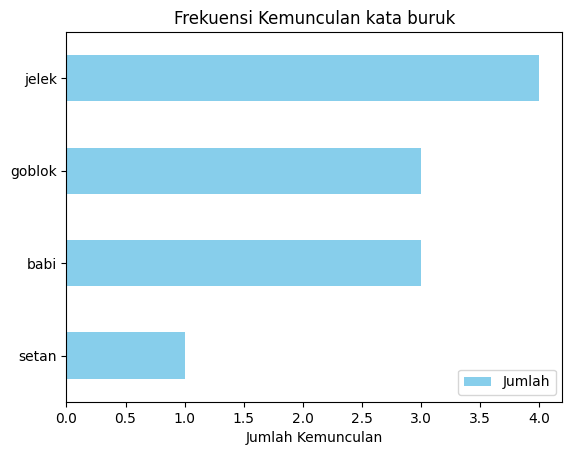

In [ ]:
# Definisikan pola regex untuk nama kasus
kataburuk_pattern = r'(babi|monyet|goblok|idiot|jelek|setan|brengsek|dekil)\s+\w+'

# Ambil kolom teks yang ingin Anda analisis
kolom_teks = dataset["full_text"]  # Ganti "nama_kolom_teks" dengan nama kolom teks dalam dataset Anda

# Gabungkan semua teks menjadi satu teks panjang
teks_panjang = " ".join(kolom_teks)

# Cari kemunculan nama jurusan menggunakan regex
kataburuk_matches = re.findall(kataburuk_pattern, teks_panjang.lower())

# Hitung frekuensi kemunculan jurusan menggunakan Counter
frekuensi_kataburuk = Counter(kataburuk_matches)


# Konversi Counter menjadi DataFrame
kataburuk_counts = pd.DataFrame.from_dict(frekuensi_kataburuk, orient='index', columns=['Jumlah'])

# Urutkan berdasarkan jumlah kemunculan
kataburuk_counts = kataburuk_counts.sort_values(by='Jumlah', ascending=False)

# Buat plot
plt.figure(figsize=(10,6))
kataburuk_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Jumlah Kemunculan')
plt.title('Frekuensi Kemunculan kata buruk')
plt.gca().invert_yaxis()  # supaya urutan dari atas ke bawah sesuai urutan di dataframe
plt.show()

##4.Stemming

In [ ]:
# Mengubah kata imbuhan menjadi kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

tokenize = tokenize.apply(stemming)

tokenize.to_csv(r"Data_Stemming", index=False)

rundung buah video aksi rundung orang siswi smp kota jambi viral media sosial korban sundut rokok pukul hingga siram minum kemas gimana nih tanggap simak video
saudara perempuan cocok buat lagi nyari baca ctm super page turner bahkan mengekamuarkan diri reading skamump topik bahas bagus bullying lewat media sosial
bojonegoro polri polri edukasi harap siswa siswi dpt tertib dlm berlakamu lintas tdk kendara sebekamum cukup umur samping edukasi para siswa siswi paham rambu lakamu lintas bijak dlm guna media sosial antisipasi cegah bullying
geger tuduh bullying brandoville studio viral media sosial
apa jenis bullying verbal hina bentuk kata kata bullying fisik laku kontak fisik cyberbullying jadi online media sosial
hindar ada beberapa yang teman mata laku  guna internet cukup batas guna sosial media hindar internet bullying
salah satu cara putus perilaku bullying ancam laku kerja sosial misal sih sakamuran got lokasi pasar pampang media elektronik cara mempermakamukan laku bullying lebih 

##5.Tf-IDF

In [ ]:
dataset.head()

,full_text,username,created_at
0,perundungan sebuah video aksi perundungan seor...,detik_sumbagsel,Fri Sep 20 04:11:59 +0000 2024
1,saudara perempuan cocok buat nyari bacaan ctm...,thisylus,Wed Sep 18 13:08:46 +0000 2024
2,bojonegoro polisi republik indonesia polisi r...,MulyonoVideo,Wed Sep 18 04:21:23 +0000 2024
3,geger tuduhan bullying brandoville studio vira...,ibenewsid,Tue Sep 17 12:10:51 +0000 2024
4,apa jenisnya bullying verbal menghina bentuk...,nznalmairra,Tue Sep 17 09:42:36 +0000 2024


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(dataset['full_text'])
print(tfidf_matrix)

  (0, 2719)	0.21641160803779397
  (0, 3047)	0.15843035182156104
  (0, 3652)	0.26947267313806966
  (0, 54)	0.14327726036924787
  (0, 3133)	0.15055126816119896
  (0, 3216)	0.16836326421309716
  (0, 3238)	0.15428842625339306
  (0, 1718)	0.176201866148118
  (0, 1359)	0.23291097296100002
  (0, 3657)	0.11126947609445594
  (0, 1937)	0.03832286770833715
  (0, 3261)	0.0382754677422271
  (0, 1711)	0.1218577043300846
  (0, 886)	0.2679824293113509
  (0, 2942)	0.2679824293113509
  (0, 839)	0.2524630626453582
  (0, 1227)	0.15055126816119896
  (0, 875)	0.2679824293113509
  (0, 2283)	0.2679824293113509
  (0, 1583)	0.2679824293113509
  (0, 1116)	0.2104131634292277
  (0, 2426)	0.23291097296100002
  (0, 3368)	0.2679824293113509
  (0, 3197)	0.16980779291938572
  (1, 1937)	0.03699843499410059
  :	:
  (805, 3730)	0.1763669840149762
  (805, 1554)	0.1846988803243631
  (805, 52)	0.18993086967624215
  (805, 1598)	0.19498469877994232
  (805, 3703)	0.19498469877994232
  (805, 2984)	0.39032413596611953
  (805, 285

In [ ]:
assert all(isinstance(doc, str) for doc in dataset), "Dokumen harus berupa string."

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


# Asumsikan kolom yang berisi teks adalah 'text'
documents = dataset['full_text'].tolist()

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Hitung TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Menampilkan hasil
print("Feature Names (Kata-Kata):")
print(tfidf_vectorizer.get_feature_names_out())

print("\nTF-IDF Matrix:")
print(tfidf_matrix.toarray())

# Menampilkan hasil dalam format DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("\nTF-IDF DataFrame:")
print(tfidf_df)


Feature Names (Kata-Kata):
['aamiin' 'aare' 'abg' ... 'zein' 'zero' 'zia']

TF-IDF Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

TF-IDF DataFrame:
     aamiin  aare  abg  abuse  account  action  actually   ad  adab  adakah  \
0       0.0   0.0  0.0    0.0      0.0     0.0       0.0  0.0   0.0     0.0   
1       0.0   0.0  0.0    0.0      0.0     0.0       0.0  0.0   0.0     0.0   
2       0.0   0.0  0.0    0.0      0.0     0.0       0.0  0.0   0.0     0.0   
3       0.0   0.0  0.0    0.0      0.0     0.0       0.0  0.0   0.0     0.0   
4       0.0   0.0  0.0    0.0      0.0     0.0       0.0  0.0   0.0     0.0   
..      ...   ...  ...    ...      ...     ...       ...  ...   ...     ...   
802     0.0   0.0  0.0    0.0      0.0     0.0       0.0  0.0   0.0     0.0   
803     0.0   0.0  0.0    0.0      0.0     0.0       0.0  0.0   0.0     0.0   
804     0.0   0.0  0.0 

In [ ]:
# Periksa apakah data teks kosong
print("Apakah ada data kosong?", dataset['full_text'].isnull().sum())

# Tampilkan beberapa data teks sebelum TF-IDF
print("Data teks awal:")
print(dataset['full_text'].head())

# Tampilkan fitur yang dihasilkan
print("Fitur yang dihasilkan:")
print(tfidf_vectorizer.get_feature_names_out())

# Periksa matriks TF-IDF
print("Matriks TF-IDF:")
print(tfidf_matrix.toarray())

Apakah ada data kosong? 0
Data teks awal:
0    perundungan sebuah video aksi perundungan seor...
1     saudara perempuan cocok buat nyari bacaan ctm...
2     bojonegoro polisi republik indonesia polisi r...
3    geger tuduhan bullying brandoville studio vira...
4     apa jenisnya bullying verbal  menghina bentuk...
Name: full_text, dtype: object
Fitur yang dihasilkan:
['aamiin' 'aare' 'abg' ... 'zein' 'zero' 'zia']
Matriks TF-IDF:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
dataset
dataset.to_csv('data_prep.csv', index=False)